In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
import seaborn as sn
from pandas.core import datetools
import scipy

In [34]:
Games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [35]:
Games.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
Games1=Games[pd.notnull(Games['Critic_Score'])]
Games1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [37]:
Games2=Games1[pd.notnull(Games1['Global_Sales'])]
Games2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [38]:
x=Games2['Global_Sales']
y=Games2['Critic_Score']

corr_pearson = np.corrcoef(x[:],y[:])
print("Correlação: " + str(corr_pearson))

X_rank = np.array(scipy.stats.stats.rankdata(x))
print(X_rank)

Y_rank = np.array(scipy.stats.stats.rankdata(y))
print(Y_rank)

corr_spearman = np.corrcoef(X_rank[:], Y_rank[:])
print("Correlação: " + str(corr_spearman))

Correlação: [[ 1.          0.24547068]
 [ 0.24547068  1.        ]]
[ 8137.  8136.  8135. ...,    75.    75.    75.]
[ 5325.   6684.5  6244.  ...,   683.   1991.5  2493.5]
Correlação: [[ 1.          0.39401469]
 [ 0.39401469  1.        ]]


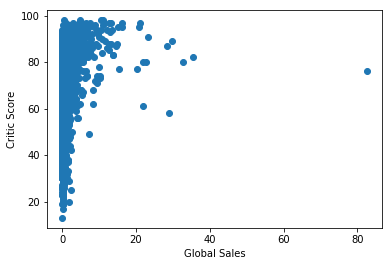

Correlação: [[ 1.          0.24547068]
 [ 0.24547068  1.        ]]


In [39]:
x = Games2.Global_Sales
y = Games2.Critic_Score

plt.scatter(x, y)
plt.xlabel('Global Sales')
plt.ylabel('Critic Score')
plt.show()

corr = np.corrcoef(x, y)
print('Correlação: ' + str(corr))

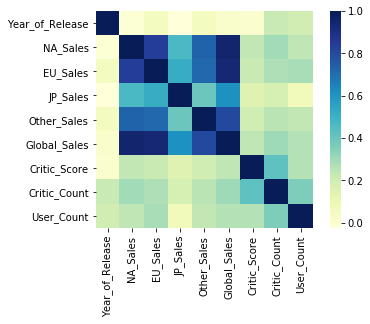

Correlação: [[  1.  nan]
 [ nan  nan]]


In [45]:
x = Games2.Global_Sales
y = Games2.Year_of_Release

sn.heatmap(Games2.corr(), square=True, cmap='YlGnBu')
plt.show()
corr = np.corrcoef(x, y)
print('Correlação: ' + str(corr))

In [ ]:
x = Games2.Global_Sales
y = Games2.Publisher

plt.scatter(x, y)
plt.xlabel('Global Sales')
plt.ylabel('Publisher')
plt.show()

corr = np.corrcoef(x, y)
print('Correlação: ' + str(corr))